## 2019

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import json
import platform
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.font_manager as fm
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [3]:
# 변경할 폴더 경로
folder_path = "./2019_2022_강원도_카테고리별_관광인프라/중심관광지"
# 폴더 내의 파일 목록을 가져옴
file_list = os.listdir(folder_path)
# 데이터프레임들이 들어갈 리스트 만들기
df=[]

df_2019=pd.DataFrame()
### 18->16->15
for i in range(0,18,1):
    # 파일명에서 시군명 추출
    sigoon=file_list[i][4:7]
    # 각 파일경로 지정
    file_path=("./2019_2022_강원도_카테고리별_관광인프라/중심관광지/2019{}중심 관광지.csv".format(sigoon))
    # df에 각각의 데이터프레임명 추가하기
    df.append(pd.read_csv(file_path, encoding="euc-kr"))
    # 데이터프레임에 도명/시군명 컬럼 추가
    #df[i]["도명"]="강원도"
    #df[i]["시군명"]=sigoon
    # "중심카테고리 명_대" 데이터 삭제
    del(df[i]["중심카테고리 명_대"])

In [4]:
lst_area = []
lst_area = df[0]["분류"].unique()

In [5]:
df[2]

,중심 POI X 좌표,중심 POI Y 좌표,관광지명,주소,분류,순위
0,129.1124,37.5498,묵호항,강원 동해시,자연관광,1
1,129.1599,37.4790,촛대바위,강원 동해시,기타관광,2
2,129.0900,37.5937,망상해수욕장,강원 동해시 동해대로 6270-21,자연관광,3
3,129.1101,37.5173,천곡황금박쥐동굴,강원 동해시 동굴로 50-0,자연관광,4
4,129.1171,37.5239,이마트/동해점,강원 동해시 천곡로 100-0,쇼핑,5
...,...,...,...,...,...,...
95,129.1221,37.5277,고불개해변,강원 동해시 한섬해안길 104-0,자연관광,96
96,129.1084,37.5282,동해한옥동안재,강원 동해시 천곡1길 74-2,숙박,97
97,129.0852,37.5940,별장온천텔,강원 동해시 동해대로 6313-0,숙박,98
98,129.1137,37.5748,비치갤러리펜션,강원 동해시 대진1길 47-3,숙박,99


In [6]:
lst_area

array(['자연관광', '쇼핑', '숙박', '문화관광', '역사관광', '레저스포츠', '기타관광', '체험관광'],
      dtype=object)

In [7]:
df_area = lst_area.copy()

In [8]:
for i in range(18):
    df_lst_lst = []
    for i in range(8):
        condition = df[0]["분류"] == lst_area[i]
        df_area[i] = df[0][condition == True].reset_index(drop = True)

In [9]:
df_area[0]

,중심 POI X 좌표,중심 POI Y 좌표,관광지명,주소,분류,순위
0,128.9078,37.8055,경포해변,강원 강릉시,자연관광,1
1,128.9473,37.7731,안목해변,강원 강릉시 창해로14번길 20-1,자연관광,2
2,128.8299,37.8920,주문진항,강원 강릉시 해안로 1758-14,자연관광,4
3,128.9176,37.7966,강문해변,강원 강릉시,자연관광,7
4,128.8192,37.9110,주문진해변,강원 강릉시 주문북로 0-0,자연관광,20
5,128.8453,37.8691,영진해변,강원 강릉시,자연관광,23
6,128.9522,37.7705,강릉항,강원 강릉시 창해로14번길 51-4,자연관광,25
7,129.0345,37.6908,정동진해변,강원 강릉시 정동역길 17-0,자연관광,26
8,128.8785,37.8300,사천해변,강원 강릉시 해안로 0-0,자연관광,27
9,128.9023,37.7968,경포호,강원 강릉시 경포로 0-0,자연관광,30


In [10]:
df_area[1]

,중심 POI X 좌표,중심 POI Y 좌표,관광지명,주소,분류,순위
0,128.8986,37.7540,강릉중앙시장,강원 강릉시 금성로 21-0,쇼핑,3
1,128.8277,37.8910,주문진수산시장,강원 강릉시 시장2길 6-0,쇼핑,6
2,128.9226,37.7705,이마트/강릉점,강원 강릉시 경강로 2398-10,쇼핑,10
3,128.8986,37.7558,홈플러스/강릉점,강원 강릉시 경강로 2120-0,쇼핑,14
4,128.8297,37.8935,어민수산시장,강원 강릉시 해안로 1786-0,쇼핑,52


In [11]:
lst_name = []
for i in range(8):
    lst_name.append(lst_area[i])

In [12]:
lst_name=['자연관광', '쇼핑', '숙박', '문화관광', '역사관광', '레저스포츠', '기타관광', '체험관광']
length = len(lst_name)
print(length)

8


In [13]:
df

[    중심 POI X 좌표  중심 POI Y 좌표               관광지명                     주소    분류   
 0      128.9078      37.8055               경포해변                 강원 강릉시  자연관광  \
 1      128.9473      37.7731               안목해변    강원 강릉시 창해로14번길 20-1  자연관광   
 2      128.8986      37.7540             강릉중앙시장        강원 강릉시 금성로 21-0    쇼핑   
 3      128.8299      37.8920               주문진항     강원 강릉시 해안로 1758-14  자연관광   
 4      128.9209      37.7911            세인트존스호텔       강원 강릉시 창해로 307-0    숙박   
 ..          ...          ...                ...                    ...   ...   
 95     128.8485      37.8265            수상한마법학교       강원 강릉시 미노길 103-0  문화관광   
 96     129.0376      37.6869           정동진시간박물관       강원 강릉시 헌화로 990-1  문화관광   
 97     128.8200      37.9088  베니키아호텔/산과바다주문진리조트      강원 강릉시 해안로 2070-0    숙박   
 98     128.9842      37.7419               염전해변                 강원 강릉시  자연관광   
 99     128.8765      37.7653            호텔이스트나인  강원 강릉시 교동광장로100번길 8-6    숙박   
 
      순위  
 0     1  
 1  

In [14]:
### 
color_list = ['#0a676c', '#70a3bd', '#c16e2e', "#89cff0", "#790b9e", "#e51111", "#6c78d7", "#403157"]
gw_list = []
gw_map = folium.Map(location=[37.882531, 127.7291452], tiles="CartoDB positron", zoom_start=7)

layer_control = folium.LayerControl()

for idx, df in enumerate(df_area):
    layer = folium.FeatureGroup(name=f"Layer {idx+1}" +":"+ "{}".format(lst_name[idx]) )
    
    for i in range(len(df)):
        lat = df.loc[i, "중심 POI Y 좌표"]
        lng = df.loc[i, "중심 POI X 좌표"]
        marker_weight = 5
        colorcolor = color_list[idx]

        folium.CircleMarker(location=[lat, lng],
                            fill_color=colorcolor,
                            fill_opacity=1,
                            color=colorcolor,
                            weight=marker_weight,
                            radius=marker_weight
                            ).add_to(layer)
    
    layer.add_to(gw_map)


# 그래프 생성
G = ox.graph_from_place('강원도, 대한민국', network_type='drive')

# 출발지, 경유지, 도착지 좌표 설정
orig_coord = (37.8897796, 127.7398952)  # 출발지 좌표 (춘천시)
waypoint_coord = (37.3082307, 127.9294889)  # 경유지 좌표
dest_coord = (37.7091295, 128.8324462)  # 도착지 좌표 (강릉시)

# 좌표를 가장 가까운 노드로 변환
orig_node = ox.nearest_nodes(G, orig_coord[0], orig_coord[1])
waypoint_node = ox.nearest_nodes(G, waypoint_coord[0], waypoint_coord[1])
dest_node = ox.nearest_nodes(G, dest_coord[0], dest_coord[1])

# 최단 경로 계산
graph = ox.project_graph(G)
route = nx.shortest_path(graph, orig_node, dest_node, weight='length')

# 경로를 맵에 추가
folium.PolyLine(locations=[(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route], color='blue', weight=5, popup="경로").add_to(gw_map)


# 레이어 컨트롤 맵에 추가
layer_control.add_to(gw_map)

gw_map


NameError: name 'ox' is not defined

In [15]:
### 강원도 도로데이터 가져오기
# www.openstreetmap.org에서 검색 결과가 city-state-country 단위로 나와야 함 

G = ox.graph_from_place('강원도, 대한민국', network_type='drive')
fig, ax = ox.plot_graph(G)

NameError: name 'ox' is not defined

In [16]:
G_proj = ox.project_graph(G)
### 출발지&도착지 설정
# - 출발지: 경포해변[37.7540, 128.8986]
orig_node = ox.nearest_nodes(G, 37.7540, 128.8986) 
# 경유지
#waypoint = (37.3082307, 127.9294889)  
# 목표지점: 이마트/강릉점[37.7705, 128.9226]
dest_node = ox.nearest_nodes(G_proj, 37.7705, 128.9226) 

NameError: name 'ox' is not defined

In [17]:
orig_node

NameError: name 'orig_node' is not defined

In [38]:
dest_node

3866297229

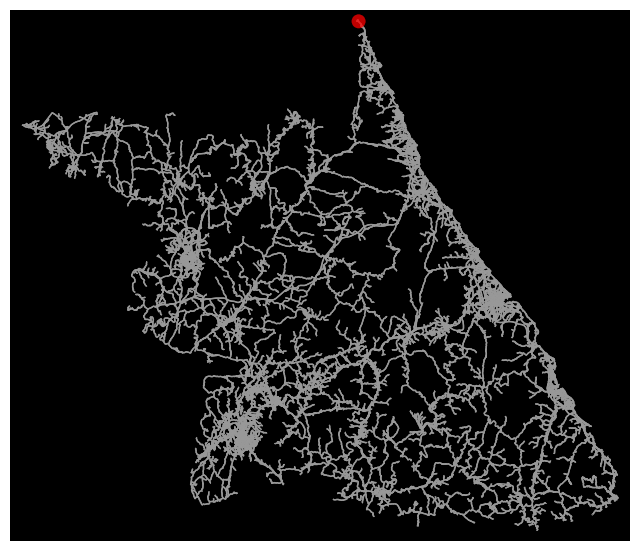

In [40]:
### 루트 최단경로 분석
# - 경유지를 들리지 않는 경우
# route = nx.shortest_path(G, orig_node, dest_node, weight='length')
# 최단 거리 계산
orig_coord = (37.7540, 128.8986)  # 출발지 좌표
dest_coord = (37.7705, 128.9226)  # 도착지 좌표

# 좌표를 가장 가까운 노드로 변환
orig_node = ox.nearest_nodes(G, orig_coord[0], orig_coord[1])
dest_node = ox.nearest_nodes(G, dest_coord[0], dest_coord[1])

# 최단 경로 계산
graph = ox.project_graph(G)
route = nx.shortest_path(graph, orig_node, dest_node, weight='length')

# 최단 경로 출력
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

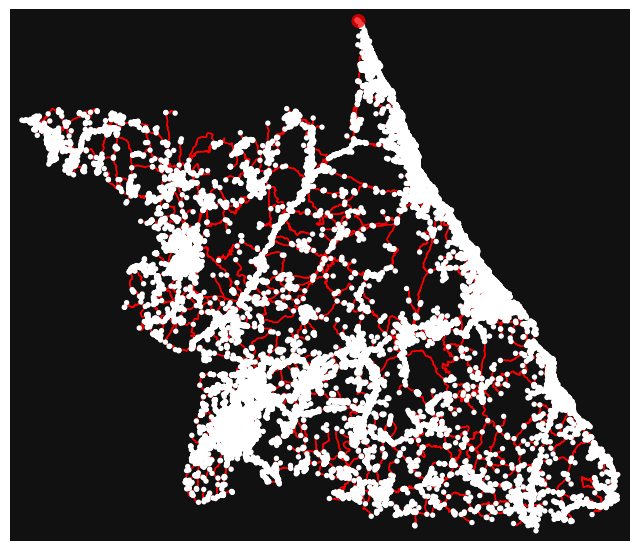

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [104]:
# 최단 거리를 맵에 추가
route_line = ox.plot_graph_route(graph, route, route_linewidth=5, edge_color='red')
route_line
# route_line.add_to(gw_map)

# # Folium 맵 출력
# gw_map

In [103]:
# 그래프 생성
G = ox.graph_from_place('강원도, 대한민국', network_type='drive')

# 출발지, 경유지, 도착지 좌표 설정
orig_coord = (37.8897796, 127.7398952)  # 출발지 좌표 (춘천시)
waypoint_coord = (37.3082307, 127.9294889)  # 경유지 좌표
dest_coord = (37.7091295, 128.8324462)  # 도착지 좌표 (강릉시)

# 좌표를 가장 가까운 노드로 변환
orig_node = ox.nearest_nodes(G, orig_coord[0], orig_coord[1])
waypoint_node = ox.nearest_nodes(G, waypoint_coord[0], waypoint_coord[1])
dest_node = ox.nearest_nodes(G, dest_coord[0], dest_coord[1])

# 최단 경로 계산
graph = ox.project_graph(G)
route = nx.shortest_path(graph, orig_node, dest_node, weight='length')

# 경로를 맵에 추가
folium.PolyLine(locations=[(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route], color='red', weight=5, popup="경로").add_to(gw_map)


# 레이어 컨트롤 맵에 추가
layer_control.add_to(gw_map)

gw_map

In [12]:
# Folium 맵 생성
gw_map = folium.Map(location=[37.882531, 127.7291452], tiles="CartoDB positron", zoom_start=7)

# 출발지와 도착지 좌표 설정
origin = (37.882531, 127.7291452)
destination = (37.123456, 127.987654)  # 최단 거리를 계산할 도착지 좌표

# 최단 거리 계산
graph = ox.graph_from_point(origin, network_type='all')
route = ox.shortest_path(graph, origin, destination, weight='length')

# 최단 거리를 맵에 추가
route_line = ox.plot_graph_route(graph, route, route_linewidth=5, edge_color='red')
route_line.add_to(gw_map)

# Folium 맵 출력
gw_map

NodeNotFound: Either source 37.882531 or target 37.123456 is not in G

In [95]:
gw_list[0]

In [32]:
len(df_area[0])

33

In [25]:
for idx in df_area[idx].index:
    print(idx)

IndexError: index 98 is out of bounds for axis 0 with size 8